1. Install scikit-learn

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


1.5 Install Matplotlib for data visualisation (optional)

In [4]:
pip install matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


2. Import necessary libraries, loads data set, puts x and y targets

In [5]:
import numpy as np
import matplotlib.pyplot as plt  # Make sure to import pyplot
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: Species of iris (Setosa, Versicolour, Virginica)

3. Split the dataset into training (80%) and testing (20%) data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Initializes the Logistic Regression model and trains (.fit) the model using the data

In [7]:
model = LogisticRegression(max_iter=200)  # Increase max_iter to ensure convergence

model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

5. Make predictions on the test data

In [8]:
y_pred = model.predict(X_test)


6. Evaluate the model's accuracy

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


Predict species for new data

In [10]:
new_samples = [[5.1, 3.5, 1.4, 0.2],  # Setosa-like flower
               [6.5, 3.0, 5.8, 2.2]]  # Virginica-like flower

predictions = model.predict(new_samples)

# Convert numerical labels back to species names
species = [iris.target_names[p] for p in predictions]
print(f"Predicted species: {species}")


Predicted species: [np.str_('setosa'), np.str_('virginica')]


8. Visualise Data (optional)

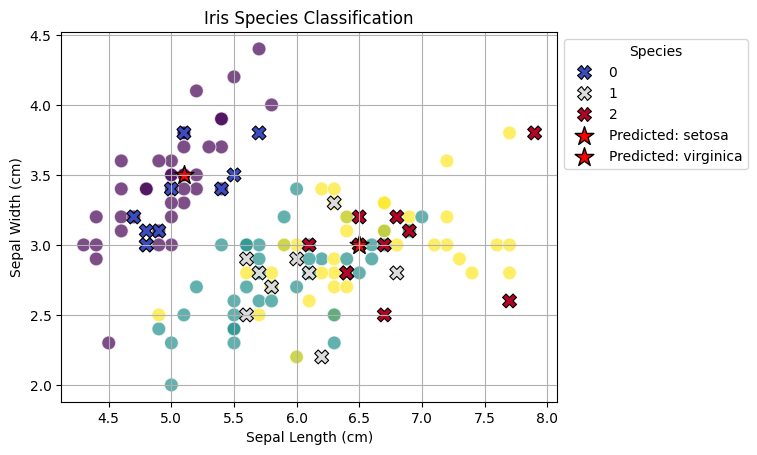

In [12]:
# Scatter plot of the training data 
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='viridis', s=100, alpha=0.7)

# Scatter plot of the test data
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='coolwarm', s=100, marker='X', edgecolor='black')

# Plot new sample predictions
for sample, label in zip(new_samples, species):
    plt.scatter(sample[0], sample[1], color='red', s=200, edgecolor='black', marker='*', label=f'Predicted: {label}')

# Add titles and labels
plt.title('Iris Species Classification')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Manually handle the legend to avoid conflicts
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Species', loc='upper left', bbox_to_anchor=(1, 1))

plt.grid()
plt.show()